<a href="https://colab.research.google.com/github/dss5202-2410/Notebooks/blob/main/Intro_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to `pandas`

Data scientists have to deal with a lot of data at once. While Google Sheets and Excel are great ways to organize and visualize data, they are **NOT** as versatile as we might want.

That is where **DataFrame**s come in.

In this section, you will be introduced to data frames and learn to use them to obtain information from data.

First of all, we will import the `numpy` and `pandas` libraries.

+ In the code below, we import them under the alias `np` and `pd`, respectively.

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

**Reminder about built-in documentations**

We can explore the contents of a libary as well as the documentation of various functions using the `?` character. For example, to display `pandas`' built-in documentation, you can use the following:

In [ ]:
pd?

## Series

A `pandas` `series` is a one-dimensional array of indexed data. It can be created from a list of array.

In [ ]:
s1 = pd.Series([3, 4.3, 2.7, 8, 91, 5.8])
print(s1)

0     3.0
1     4.3
2     2.7
3     8.0
4    91.0
5     5.8
dtype: float64


As we see in the output, the `Series()` wraps both a sequence of values and a sequence of indices, which we can use to access the `values` and `index` attributes, respectively.

In [ ]:
s1.values

array([ 3. ,  4.3,  2.7,  8. , 91. ,  5.8])

In [ ]:
s1.index

RangeIndex(start=0, stop=6, step=1)

Data can be accessed by the associated index via the square-bracket notation.

In [ ]:
s1[1]

4.3

In [ ]:
s1[0:2]

0    3.0
1    4.3
dtype: float64

Index in a given `series` need not be an integer, but can consist of values of any desired type. For example, we can use strings as an index.

In [ ]:
s2 = pd.Series([3, 4.3, 2.7, 8, 91, 5.8],
               index = ["a", "b", "c", "d", "e", "f"])
print(s2)

a     3.0
b     4.3
c     2.7
d     8.0
e    91.0
f     5.8
dtype: float64


We can access items in the `series` in a similar way.

In [ ]:
s2["b"]

4.3

## DataFrame

The next fundamental structure in `pandas` is the `DataFrame`.

Let's try to read in a file as a `DataFrame`.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/My Drive/DSS5202/wk1_global_temperature.csv")
df.head()

Mounted at /content/drive
   year  temperature_anomaly
0  1880                -0.17
1  1881                -0.08
2  1882                -0.11
3  1883                -0.18
4  1884                -0.29


### Explore the data

This data set was obtained from [NOAA](https://climate.nasa.gov/vital-signs/global-temperature/). It contains the average global temperature anomaly for each year since 1880.

Let's start by looking at the shape (dimension) of the data.

+ It has 142 observations and 2 columns.

In [ ]:
df.shape

(142, 2)

Let's look at what the columns represent.

+ `year`: The year of observation.

+ `temperature_anomaly`: Average global temperature anomaly (degrees Celsius, relative to 1951-1980).

In [ ]:
df.columns

We can create a simple **line graph** on this time-series data set.

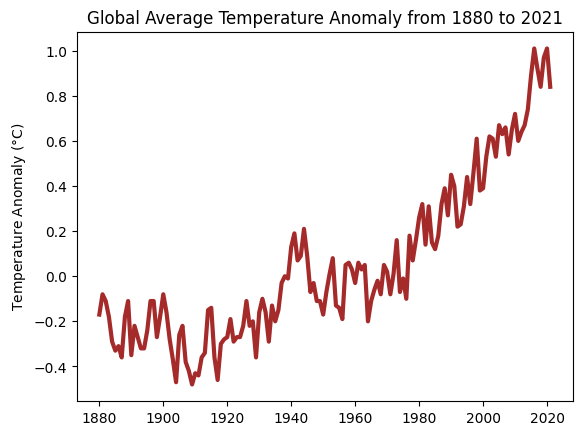

In [ ]:
import matplotlib.pyplot as plt
x = np.array(df["year"])
y = np.array(df["temperature_anomaly"])
plt.plot(x, y, "brown", linewidth = 3)
plt.title("Global Average Temperature Anomaly from 1880 to 2021")
plt.ylabel("Temperature Anomaly ($\degree$C)")
plt.show()

## Case study 1: Glasgow Facial Matching Test

Now we are going to explore a data set about sleep deprivation and try more complex tasks wth `pandas`.

The data come from the [Glasgow Facial Matching Test](https://link.springer.com/article/10.3758/BRM.42.1.286). In this study, the researchers investigage how sleep deprivation affect a person's ability to match faces. Briefly, subjects in the study were asked to look at a pair of faces, such as the one below:

<img src="https://bebi103a.github.io/_images/gfmt_faces.png" width="300">

The top two pictures are from the same person, while the bottom two are from different people. For each pair of faces, the subjects needs to say whether or not they are the same person. They will also rate his/her confidence in the choice.

In the study, subjects also take surveys to determine properties about their sleep.

It is available on Canvas as `wk1_Glasgow.csv`. The code below reads it in from Google Drive.

In [8]:
from google.colab import drive
drive.mount("/content/drive")
df1 = pd.read_csv("/content/drive/My Drive/DSS5202/wk1_Glasgow.csv")
df1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50,75.0,50,4,11,7
2,18,f,31,90,95,92.5,89.5,90,86.0,81,89.0,88,10,9,3
3,22,f,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20
4,27,f,74,60,65,62.5,68.5,49,61.0,49,65.0,49,13,9,12


The column names are in the **headers** of the `DataFrame`. They are participant number, gender, age, etc. There are two important things to note here.

1. The `gender` column has string data (`m` or `f`), while the rest of the data are numeric.

2. There are also some **missing values**, denoted by the `*`s in the file.

We can use `na_values = "*"` to specify that entries marked with a `*` are missing. The resulting data frame is populated with `NaN`, or *not-a-number*, wherever this character is present in the file.

In [10]:
df1 = pd.read_csv("/content/drive/My Drive/DSS5202/wk1_Glasgow.csv", na_values = "*")
df1.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12


### Exploring the data

Let's take a closer look at the data frame.

We see that column headings are automatically assigned. `Pandas` also automatically define the indices (names of the rows) as integers from zero.

### Indexing data frames

Let's start by looking at how the data frame is indexed. We can try to look at the first row like this:

In [13]:
df1.loc[0]

participant number                8
gender                            f
age                              39
correct hit percentage           65
correct reject percentage        80
percent correct                72.5
confidence when correct hit    91.0
confidence incorrect hit       90.0
confidence correct reject      93.0
confidence incorrect reject    83.5
confidence when correct        93.0
confidence when incorrect      90.0
sci                               9
psqi                             13
ess                               2
Name: 0, dtype: object

We can also pull out a single column, say `percent correct`, of the first row.





In [14]:
df1.loc[0, "percent correct"]

72.5

Let's say we wanted the `percent correct` value for participant number `42`. We can use **boolean indexing** to specify that row.

Specifically, we want to row for which `df1["participant number"] == 42. We can use this syntax inside of `.loc[]`.

In [19]:
df1.loc[df1["participant number"] == 42, "percent correct"]

54    85.0
Name: percent correct, dtype: float64

The following code pulls the whole record for that participant. We use `:` for the column index.

In [20]:
df1.loc[df1["participant number"] == 42, :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
54,42,m,29,100,70,85.0,75.0,NaN,64.5,43.0,74.0,43.0,32,1,6


Now, let's pull out records of female under the age of 21. We can again use boolean indexing, but this time we need an `&` operator, which mean the logical operation `and`.

Note that it is important to wrap each boolean operation with parentheses.

In [22]:
df1.loc[(df1["age"] < 21) & (df1["gender"] == "f"), :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
27,3,f,16,70,80,75.0,70.0,57.0,54.0,53.0,57.0,54.5,23,1,3
29,5,f,18,90,100,95.0,76.5,83.0,80.0,NaN,80.0,83.0,21,7,5
66,58,f,16,85,85,85.0,55.0,30.0,50.0,40.0,52.5,35.0,29,2,11
79,72,f,18,80,75,77.5,67.5,51.5,66.0,57.0,67.0,53.0,29,4,6
88,85,f,18,85,85,85.0,93.0,92.0,91.0,89.0,91.5,91.0,25,4,21


We can do something more complicated, like pulling out all females under 30 who got more than 85% of the face matching tasks correct.

Since the condition is more complicated, the code will be clearer if we set up the boolean indexing first, as follows:

In [24]:
idx = (df1["age"] < 30) & (df1["gender"] == "f") & (df1["percent correct"] > 85)
df1.loc[idx, :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
22,93,f,28,100,75,87.5,89.5,NaN,67.0,60.0,80.0,60.0,16,7,4
29,5,f,18,90,100,95.0,76.5,83.0,80.0,NaN,80.0,83.0,21,7,5
30,6,f,28,95,80,87.5,100.0,85.0,94.0,61.0,99.0,65.0,19,7,12
33,10,f,25,100,100,100.0,90.0,NaN,85.0,NaN,90.0,NaN,17,10,11
56,44,f,21,85,90,87.5,66.0,29.0,70.0,29.0,67.0,29.0,26,7,18
58,48,f,23,90,85,87.5,67.0,47.0,69.0,40.0,67.0,40.0,18,6,8
60,51,f,24,85,95,90.0,97.0,41.0,74.0,73.0,83.0,55.5,29,1,7
75,67,f,25,100,100,100.0,61.5,NaN,58.5,NaN,60.5,NaN,28,8,9


### Calculating with data frames

In this study, a subject is said to suffer from insomnia if he or she has an SCI measure of 16 or below. We can add a column to the data frame that specifies whether or not the subject suffers from insomnia.

In thd code below, notice how applying the `<=` operator to a column resulted in **elementwise** calculation. This is called **vectorization**. It allows for much more convenient calculation.

In [25]:
df1["insomnia"] = df1["sci"] <= 16
df1.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


### Applying functions to `pandas` objects

We can quickly compute summary statistics about each column of the data frame using the `describe()` method.

This gives us a data frame with summary statistics.

In [26]:
df1.describe()

,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
count,102.00,102.00,102.00,102.00,102.00,102.00,84.00,102.00,93.00,102.00,99.00,102.00,102.00,102.00
mean,52.05,37.92,83.09,77.21,80.15,74.99,58.57,71.14,61.22,74.64,61.98,22.25,5.27,7.29
std,30.02,14.03,15.09,17.57,12.05,14.17,19.56,14.99,17.67,13.62,15.92,7.55,3.40,4.43
min,1.00,16.00,35.00,20.00,40.00,29.50,7.00,19.00,17.00,24.00,24.50,0.00,0.00,0.00
25%,26.25,26.50,75.00,70.00,72.50,66.00,46.38,64.62,50.00,66.00,51.00,17.00,3.00,4.00
50%,52.50,36.50,90.00,80.00,83.75,75.00,56.25,71.25,61.00,75.75,61.50,23.50,5.00,7.00
75%,77.75,45.00,95.00,90.00,87.50,86.50,73.50,80.00,74.00,82.38,73.00,29.00,7.00,10.00
max,103.00,74.00,100.00,100.00,100.00,100.00,92.00,100.00,100.00,100.00,100.00,32.00,15.00,21.00


If we want to extract the median value of each entry, we could do that with `.loc()`.

In [27]:
df1.describe().loc["50%", :]

participant number             52.50
age                            36.50
correct hit percentage         90.00
correct reject percentage      80.00
percent correct                83.75
confidence when correct hit    75.00
confidence incorrect hit       56.25
confidence correct reject      71.25
confidence incorrect reject    61.00
confidence when correct        75.75
confidence when incorrect      61.50
sci                            23.50
psqi                            5.00
ess                             7.00
Name: 50%, dtype: float64

### Exporting a CSV file

Now that we added the insomnia column, we might want to save the new data frame as a new CSV that we can re-load later.

To do this, use the `.to_csv()` with the `index = False` option, which explicitly asks `pandas` not to write the row indices to the file.

In [29]:
df1.to_csv("/content/drive/My Drive/DSS5202/wk1_Glasgow_updated.csv", index = False)

Let's look at what this file looks like. Notice that by default, `pandas` leaves an empty field for `NaN`s. So we do not need to use `na_values` when re-loading the data.

In [35]:
pd.read_csv("/content/drive/My Drive/DSS5202/wk1_Glasgow_updated.csv").head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


### Renaming columns

You may be annoyed with the column names (`sci`, `psqi`, and `ess`) and make them more self-explanatory.

To rename the columns, we provide a **dictionary** where keys are current column names and the corresponding values are the names we wish to change them into.

In [36]:
# Make a dictionary to rename columns
rename_dict = {
    "ess": "Epworth Sleepiness Scale",
    "sci": "Sleep Condition Indicator",
    "psqi": "Pittsburgh Sleep Quality Index",
}

# Rename the columns
df1 = df1.rename(columns  =rename_dict)
df1.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,Sleep Condition Indicator,Pittsburgh Sleep Quality Index,Epworth Sleepiness Scale,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


### Tidying up the data frame

We have dipped our toe into `pandas` to see its power. Now, we will continue to introduce the concept of **tidy data**.

[Hadley Wickham](https://en.wikipedia.org/wiki/Hadley_Wickham), the chief scientist at Posit, wrote an influential article of [tidy data](http://dx.doi.org/10.18637/jss.v059.i10). Tidy data follows three rules:

1. Each variable is a column.

2. Each observation is a row.

3. Each type of observation has its own entry.

A tidy data frame is almost always much easier to work with than non-tidy data frames.

The Glasgow data set is in tidy format:

+ Each row represents a single test on a single participant.

+ The specific test is given in each column.

+ Each value has its own entry.

In the following exercises, we will see how this format allows us to easily conduct operations on data sets.

### Split-apply-combine

Let's say we want to compute the median percent correct face matchings for subjects with insomnia, and the median percent correct face matchings for those without.

What do we need to do?

1. **Split** the data set into two, according to the `insomnia` field.

2. **Apply** a median function to `percent correct` in these split data sets.

3. **Combine** the results into a new, summary data set that contains the two classes and the median for each.

This is called a **split-apply-combine** strategy, first put forward by Hadley Wickham in his article. It turns out that this is a strategy we want to use very often.

If the data are already tidy, this procedule makes a lot of sense: Choose the column you want to use to split by -- apply any function you want to these new data sets -- combine the results into a new data frame.

`panda`'s split-apply-combine operations are achieved using the `groupby()` method.

In [37]:
df2 = df1.groupby("insomnia")
df2

Notice that the `groupby()` function results in a **DataFrameGroupBy** object.

We can apply functions on this object, and the operation will be done separately in each sub-group.

In [38]:
df2.median(numeric_only = True)

,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,Sleep Condition Indicator,Pittsburgh Sleep Quality Index,Epworth Sleepiness Scale
insomnia,,,,,,,,,,,,,,
False,54.0,36.0,90.0,80.0,85.0,74.5,55.5,71.5,59.0,75.0,59.25,26.0,4.0,6.0
True,46.0,39.0,90.0,75.0,75.0,76.5,72.0,71.0,68.5,77.0,65.00,14.0,9.0,7.0


In the code above, we use the `numeric_only = True` argument so `pandas` does not attempt to find the median of categorical variable like `gender`.

The output data frame has the median of all quantities, including `percent correct` that we want.

Also note that this data frame has `insomnia` as the name of the row index. If we want to instead keep `insomnia` as a column, use the `reset_index()` method.

In [39]:
df2.median(numeric_only = True).reset_index()

,insomnia,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,Sleep Condition Indicator,Pittsburgh Sleep Quality Index,Epworth Sleepiness Scale
0,False,54.0,36.0,90.0,80.0,85.0,74.5,55.5,71.5,59.0,75.0,59.25,26.0,4.0,6.0
1,True,46.0,39.0,90.0,75.0,75.0,76.5,72.0,71.0,68.5,77.0,65.00,14.0,9.0,7.0


We can also use multiple columns in `groupby()`. For example, we may want to look at four groups, male insomaniacs, female insomaniacs, male non-insomaniacs, and female non-insomaniacs. To do this, simply pass in a list of columns in to `groupby()`.

In [40]:
df1.groupby(["gender", "insomnia"]).median().reset_index()

,gender,insomnia,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,Sleep Condition Indicator,Pittsburgh Sleep Quality Index,Epworth Sleepiness Scale
0,f,False,58.0,36.0,85.0,80.0,85.00,74.00,55.00,70.50,60.00,74.00,58.75,26.0,4.0,7.0
1,f,True,46.0,39.0,80.0,75.0,72.50,76.50,73.75,71.00,68.50,77.00,70.50,14.0,9.0,7.0
2,m,False,41.0,38.5,90.0,80.0,82.50,76.00,57.75,74.25,54.75,76.25,59.25,29.0,3.0,6.0
3,m,True,55.5,37.0,95.0,82.5,83.75,83.75,55.50,75.75,73.25,81.25,62.50,14.0,9.0,8.0


When data are tidy, we can compute grouped summary statistics very, very easily.

In [48]:
df1.groupby(["gender", "insomnia"])["percent correct"].describe()

count   mean    std   min    25%    50%    75%    max
gender insomnia                                                       
f      False      55.0  82.05  10.84  55.0  75.00  85.00  88.75  100.0
       True       19.0  73.95  13.62  45.0  67.50  72.50  83.75   95.0
m      False      22.0  80.00  12.77  40.0  77.50  82.50  89.38   95.0
       True        6.0  82.92  10.66  67.5  76.88  83.75  88.75   97.5

### Transformation

Instead of summarizing data in a group with some statistics, we can also do a **transformation** in which each row gets a new entry within a given group.

Let's create a column that gives the rank of each participant in terms of `percent correct` for an insomniac group versus non-insomniac group.

In [42]:
df1.groupby("insomnia")["percent correct"].rank(method = "first").head()

0    11.0
1    21.0
2    23.0
3    19.0
4     3.0
Name: percent correct, dtype: float64

In [44]:
df1["rank grouped by insomnia"] = df1.groupby("insomnia")["percent correct"].rank(method = "first")
df1.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,Sleep Condition Indicator,Pittsburgh Sleep Quality Index,Epworth Sleepiness Scale,insomnia,rank grouped by insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,11.0
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,21.0
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,23.0
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True,19.0
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,3.0


To verify that this worked correctly, we can sort the data frame by `insomnia` and then by `percent correct` and check the ranks.

In [ ]:
df3 = df1.sort_values(by = ["insomnia", "percent correct"])
df3[["insomnia", "percent correct", "rank grouped by insomnia"]]

Let's say we want to compute the coefficient of variation (CoV, the standard deviation divided by the mean) of variables in the data frame.

There is no built-in function to do this. We have to write our own function to compute the CoV and then se it with the `agg()` method.

In [46]:
def cov_of_var(data):
  return np.std(data) / np.mean(data)

We can apply it as an aggregation function. Since it doesn't make sense to compute CoV for categorical variable like `gender`, we first remove it from the data frame.



In [47]:
df1.drop("gender", axis = 1).groupby("insomnia").agg(cov_of_var).reset_index()

,insomnia,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,Sleep Condition Indicator,Pittsburgh Sleep Quality Index,Epworth Sleepiness Scale,rank grouped by insomnia
0,False,0.59,0.38,0.17,0.18,0.14,0.20,0.35,0.20,0.30,0.19,0.26,0.18,0.58,0.57,0.57
1,True,0.54,0.31,0.22,0.33,0.17,0.16,0.23,0.22,0.21,0.16,0.20,0.38,0.30,0.68,0.55
